In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 200
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 100

## Import data, extract target, merge test & train

In [24]:
missing_values = ["n/a", "na", "--"]

train = pd.read_csv("data/train.csv", na_values = missing_values)
train_no_target = train.drop('SalePrice', axis=1)
test = pd.read_csv("data/test.csv", na_values = missing_values)

target = train['SalePrice'].copy()

# Set flag to discriminate between test and train
train_no_target['test_data'] = False
test['test_data'] = True

# Concatenate datasets and renumber the index
full_data = pd.concat([train_no_target, test]).reset_index(drop=True)

In [25]:
full_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,test_data
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,False


## Drop useless columns, bad row

In [26]:
from src.preprocess import clean

drops = ['PoolQC', 'MiscFeature', 'FireplaceQu', 'Id']

elec_na = full_data["Electrical"].isna()
cleaner_data = full_data.drop(elec_na.loc[elec_na == True].index)

# Make sure to drop the same index in the target variable
target = target.drop(elec_na.loc[elec_na == True].index)

cleaner_data = clean(cleaner_data, drop_list=drops)

In [27]:
cleaner_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,test_data
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,False
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,False
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,False
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,False
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,False


## Match null count of sibling columns

In [28]:
from src.preprocess import null_match

siblings = [
    ["BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType1", "BsmtFinType2"],
    ["GarageFinish", "GarageYrBlt", "GarageQual", "GarageCond", "GarageType"],
    ["MasVnrType", "MasVnrArea"]   
]   

sib_match = null_match(cleaner_data, siblings)

## Fill null values

In [29]:
# Create lists of variables names for each data type: integer, float and categorical (objects)
ints = [col for col in sib_match.columns if sib_match.dtypes[col] == "int64"]
floats =  [col for col in sib_match.columns if sib_match.dtypes[col] == "float64"]
cats =  [col for col in sib_match.columns if sib_match.dtypes[col] == "object"]

fill_dict = {0: ints, 0.0: floats, "None": cats}

clean_data = clean(sib_match, fill_na=fill_dict)

# Let's confirm we've removed all nulls:
clean_data.isna().sum().sum()

0

In [31]:
clean_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,test_data
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,0,2,2008,WD,Normal,False
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,0,5,2007,WD,Normal,False
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,0,9,2008,WD,Normal,False
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,0,2,2006,WD,Abnorml,False
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,0,12,2008,WD,Normal,False


## Feature Engineering

In [32]:
from src.preprocess import feat_create
from src.preprocess import ordinal_create

ordinal_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
        'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond'] # May want to add BsmtExposure

new_feats = {
        "Total_Bath": 
            {
                1:['BsmtFullBath','FullBath'], 
                0.5: ['BsmtHalfBath', 'HalfBath']
            },
        "Porch_SF":
            {
                1: ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                    '3SsnPorch', 'ScreenPorch']
            },
        "Total_SF":
            {
                1: ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'] 
            }
}

swap_subclass = {20:'1story 1946+', 
                 30:'1story 1946-', 
                 40:'1story w attic', 
                 45:'1halfstory unfinish', 
                 50:'1halfstory finish', 
                 60:'2story 1946+', 
                 70:'2story 1946-', 
                 75:'2halfstory', 
                 80:'split multi-level', 
                 85:'split foyer', 
                 90:'duplex', 
                 120:'1story PUD 1946+', 
                 150:'1halfstory PUD', 
                 160:'2story PUD 1946+', 
                 180:'PUD multilevel', 
                 190:'2 family conv'}

feat_eng = feat_create(clean_data, new_feats)
feat_eng = ordinal_create(feat_eng, ordinal_vars)
feat_eng['MSSubClass'] = feat_eng['MSSubClass'].map(swap_subclass)

In [33]:
feat_eng.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,test_data,Total_Bath,Porch_SF,Total_SF
0,2story 1946+,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,5,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,3,3,Y,0,61,0,0,0,0,None,0,2,2008,WD,Normal,False,3.5,61.0,2566.0
1,1story 1946+,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,None,0,5,2007,WD,Normal,False,2.5,298.0,2524.0
2,2story 1946+,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,5,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,3,3,Y,0,42,0,0,0,0,None,0,9,2008,WD,Normal,False,3.5,42.0,2706.0
3,2story 1946-,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,4,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,3,3,Y,0,35,272,0,0,0,None,0,2,2006,WD,Abnorml,False,2.0,307.0,2473.0
4,2story 1946+,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,5,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,3,3,Y,192,84,0,0,0,0,None,0,12,2008,WD,Normal,False,3.5,276.0,3343.0


In [34]:
# train_only = feat_eng[feat_eng['test_data'] == False]
# train_only.drop(columns='test_data', inplace=True)
# train_only.insert(0, 'SalePrice', target)

# corr = train_only.corr()
# corr_sums = corr[corr > 0.5].sum()

# high_corr = [index for index in corr_sums.index if corr_sums[index] != 1.0]

# corr = train_only[high_corr].corr()
# # corr = corr[corr > 0.5]
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# with sns.axes_style('white'):
#     f, ax = plt.subplots(figsize=(15, 15))
#     ax = sns.heatmap(corr, mask=mask, annot=True, square=True)

## Drop highly correlated 'sibling' variables

In [35]:
drop_list = ['TotRmsAbvGrd', 'GarageArea', 'FullBath', 
             'HalfBath','BsmtHalfBath', 'BsmtFullBath',
             'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
             'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2',
             'LowQualFinSF','WoodDeckSF', 'OpenPorchSF',
             'EnclosedPorch','3SsnPorch', 'ScreenPorch' ]

final_feats = clean(feat_eng, drop_list=drop_list)

# Drop Outliers

<AxesSubplot:xlabel='Total_SF', ylabel='SalePrice'>

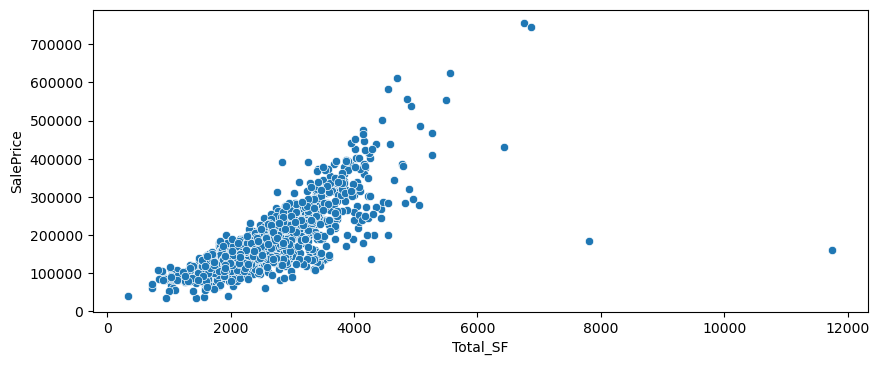

In [36]:
feats_w_target = final_feats.copy()
feats_w_target['SalePrice'] = target
sns.scatterplot(x=feats_w_target.Total_SF, y=feats_w_target.SalePrice)

In [37]:
feats_w_target[(feats_w_target.Total_SF > 7000) & (feats_w_target.SalePrice < 250000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,test_data,Total_Bath,Porch_SF,Total_SF,SalePrice
523,2story 1946+,RL,130.0,40094,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,5,3,PConc,5,3,Gd,GLQ,Unf,GasA,5,Y,SBrkr,4676,3,1,5,Typ,1,BuiltIn,2007.0,Fin,3.0,3,3,Y,0,None,0,10,2007,New,Partial,False,4.5,614.0,7814.0,184750.0
1298,2story 1946+,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,5,3,PConc,5,3,Gd,GLQ,Unf,GasA,5,Y,SBrkr,5642,3,1,5,Typ,3,Attchd,2008.0,Fin,2.0,3,3,Y,480,None,0,1,2008,New,Partial,False,4.5,506.0,11752.0,160000.0


Hence we will drop samples 523 and 1298

## Scale (standardise) and Transform (normalise) numeric variables

In [38]:
# from src.analyse import analyse
# from src.analyse import test_trans
from src.preprocess import preprocess

scale_feats =  [col for col in final_feats.columns if final_feats.dtypes[col] != "object"]
trans_feats = ['LotArea', 'Total_SF', 'GrLivArea']

final_train = final_feats[final_feats['test_data'] == False]
final_train = final_train.drop([523, 1298]) # Drop two massive outliers, see above
final_test = final_feats[final_feats['test_data'] == True]

final_train, pipelines = preprocess(final_train, scale_list=scale_feats, transform_list=trans_feats)
final_target, _ = preprocess(pd.DataFrame(target), scale_list=['SalePrice'], transform_list=['SalePrice'])
final_target = final_target['SalePrice']
final_target = final_target.drop([523, 1298]) # Drop two massive outliers


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train, X_valid, y_train, y_valid = train_test_split(final_train, final_target, test_size=0.1, random_state=42)

forest = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=42, max_features=0.5, min_samples_leaf=2, max_depth=20)
forest.fit(X_train, y_train)
preds = forest.predict(X_valid)
print(mean_squared_error(y_valid, preds, squared=False))


0.328061353666522


In [40]:
result = permutation_importance(forest, X_train, y_train, random_state=42)
importance = pd.DataFrame(final_train.columns)
importance['mean'] = result['importances_mean']
importance['std'] = result['importances_std']

importance = importance[importance['mean'] > 0.0001]
sort_import = importance.sort_values('mean', ascending=False) 
print(sort_import)
# sort_import = sort_import[:20]
# plt.figure(figsize=(5,45))
# sns.barplot(data=sort_import, x='mean', y=0)


                                0      mean       std
23                       Total_SF  0.312268  0.003563
2                     OverallQual  0.127925  0.003750
10                      GrLivArea  0.026863  0.001298
4                       YearBuilt  0.025853  0.000783
21                     Total_Bath  0.020393  0.000942
1                         LotArea  0.013538  0.000416
7                       ExterQual  0.012790  0.001103
15                     GarageCars  0.012087  0.000673
5                    YearRemodAdd  0.010815  0.000558
14                    GarageYrBlt  0.010420  0.000387
3                     OverallCond  0.007053  0.000300
13                     Fireplaces  0.005551  0.000248
22                       Porch_SF  0.005374  0.000265
219                 KitchenQual_3  0.003820  0.000581
212                  CentralAir_Y  0.003363  0.000177
0                     LotFrontage  0.002560  0.000165
18                         MoSold  0.002342  0.000065
179                    BsmtQ

## LEON EDITS

In [41]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=42, max_features=0.5, min_samples_leaf=2, max_depth=20)
forest.fit(X_train, y_train)
preds = forest.predict(X_valid)
train_preds = forest.predict(X_train)

print(forest.score(X_train, y_train))
print(forest.score(X_valid, y_valid))

print(math.sqrt(mean_squared_error(y_train, train_preds)))
print(math.sqrt(mean_squared_error(y_valid, preds)))



0.9780756685569357
0.8867578327318406
0.14913300285856387
0.31629293906471045


- Reduced max_depth to minimalize  risks of overfitting. 
- Changed max_features to 0.5. Now, we only use a specified percentage of samples in each trial to increase variation in samples. This also reduces overfitting. 

- Plot sale price after log transformation. copy() of sale price at the top. 

Potential changes:

- Filling null values: We classified columns into three categories (int, float and categories) and replaced the null values with corresponding replacement values. Others have 
    more specific approach to changing null values and have replaced null values in each column according to each column. For example, LotFrontage null values are replaced with 
    the median of the neighbourhoodtype. Whereas null values in some columns such as SaleTyppe and Exterior1st is replaced with the mode. 
    - However, out of the columns with more specific null value replacements, only LotFrontage has significant number of null values. <br>
      *sib_match[['LotFrontage', 'MSZoning', 'Functional', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']].isna().sum()*
- Transforming skewed featuers: We scaled and transformed features. Non-object features were scaled whereas a few specific features were transformed. We can consider 
    scaling only features which have a certain level of skewness. 
- Drop Utilities column. 
- Transforming the following columns into categorical variables: OverallCond, YrSold, MoSold, 
- feat_create(): second for loop .sum()?

- dummy variable trap. the last dummy variable can be deduced from the other dummy variables and therefore can be dropped, if not, it can be at risk of the dummy variable trap where the variables become multicollinear.  
https://www.algosome.com/articles/dummy-variable-trap-regression.html#:~:text=The%20Dummy%20Variable%20trap%20is,%2Ffemale)%20as%20an%20example.